#                                                        Requirement

There are two csv files that represent student response data for the years 2021 and 2022. 

**The columns of the csv files are:**

- student_id
- question_id
- ability - The ability skill of the student.
- difficulty - The difficulty of the question.
- answered_correctly - Whether the student answered the question correctly or not

**Analyse the csv files to answer the following questions:**

- How did the student's ability to answer the questions change ?
- Did the questions get difficult or easy?
- Can you create a model that can predict if a student will answer a question correctly?
- Note down any other observations you may have about the data.

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Importing all the necessary libraries

In [87]:
student_2021 = pd.read_csv('data/student_responses_2021.csv')
student_2022 = pd.read_csv('data/student_responses_2022.csv')

In [88]:
student_2021.head(10)


,student_id,question_id,ability,difficulty,answered_correctly
0,967,40,-0.320326,1.572793,False
1,135,2,-2.897524,-1.920777,False
2,553,18,-1.207800,-0.482901,False
3,564,29,-2.012802,0.360224,False
4,449,42,0.332158,1.211066,False
5,300,44,0.288807,1.545650,False
6,34,42,-0.756414,1.211066,False
7,150,12,1.471716,-1.353509,True
8,291,37,-1.702323,0.745745,False
9,950,40,-1.164242,1.572793,False


In [89]:
student_2022.head(10)

,student_id,question_id,ability,difficulty,answered_correctly
0,1078,22,1.023237,-0.280792,True
1,1980,37,-2.243018,1.430540,False
2,1240,14,3.453396,-0.872714,True
3,1329,33,1.750230,0.816172,True
4,1995,17,2.288340,-0.558914,True
5,1794,11,-4.302551,-0.687780,False
6,1838,45,-0.371450,1.290243,False
7,1620,21,-2.150135,-0.349215,False
8,1422,35,-1.633844,0.910896,False
9,1490,48,-0.563243,1.972372,False


In [90]:
student_2022.shape

(50000, 5)

In [91]:
student_2021['year'] = 2021
student_2022['year'] = 2022

Making use of both the 2021 and 2022 datasets to further my analysis

In [92]:
students = pd.concat([student_2021,student_2022],ignore_index=True)
students

,student_id,question_id,ability,difficulty,answered_correctly,year
0,967,40,-0.320326,1.572793,False,2021
1,135,2,-2.897524,-1.920777,False,2021
2,553,18,-1.207800,-0.482901,False,2021
3,564,29,-2.012802,0.360224,False,2021
4,449,42,0.332158,1.211066,False,2021
...,...,...,...,...,...,...
94995,1402,13,0.460793,-1.077263,True,2022
94996,1954,19,4.303861,-0.319677,True,2022
94997,1763,39,-0.644500,0.947210,False,2022
94998,1632,4,NaN,-1.316538,True,2022


In [93]:
df = students.copy()

In [94]:
students.isna().sum()

student_id               0
question_id              0
ability               1900
difficulty            1900
answered_correctly       0
year                     0
dtype: int64

I decided to drop the rows with missing (NaN) values, as there are only 1,900 such instances. Given the overall size of the dataset, this small proportion of missing values is unlikely to significantly impact the analysis. Although there are various methods to handle NaN values, such as imputing with the mean, median, or mode, I found that dropping them was the most suitable approach in this case. I did experiment with imputation methods, but after careful consideration, I opted for deletion to maintain the dataset's integrity and avoid introducing potential biases or distortions from estimated values

In [95]:
students.dropna(inplace=True)

In [96]:
students.drop_duplicates()

,student_id,question_id,ability,difficulty,answered_correctly,year
0,967,40,-0.320326,1.572793,False,2021
1,135,2,-2.897524,-1.920777,False,2021
2,553,18,-1.207800,-0.482901,False,2021
3,564,29,-2.012802,0.360224,False,2021
4,449,42,0.332158,1.211066,False,2021
...,...,...,...,...,...,...
94994,1706,47,-4.150532,2.034667,False,2022
94995,1402,13,0.460793,-1.077263,True,2022
94996,1954,19,4.303861,-0.319677,True,2022
94997,1763,39,-0.644500,0.947210,False,2022


## How did the student's ability to answer the questions change ?

To assess how students' ability to answer questions has evolved, I will first compute the average ability scores for each year, 2021 and 2022. This will involve analyzing the data to determine whether there has been a noticeable improvement or decline in performance over time. By comparing the average scores, we can gain insights into whether students are becoming more proficient in answering questions or if they are struggling more than in the previous year. Additionally, I may examine the distribution of ability scores for both years to identify trends, such as shifts in the performance of particular student groups. Overall, this analysis will provide a clearer picture of the changes in students' abilities between the two academic years.

In [97]:
ability_per_year = students.groupby('year')['ability'].mean()
print(f"Average ability to answer question per year: {ability_per_year}")

Average ability to answer question per year: year
2021   -0.042656
2022    0.327987
Name: ability, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


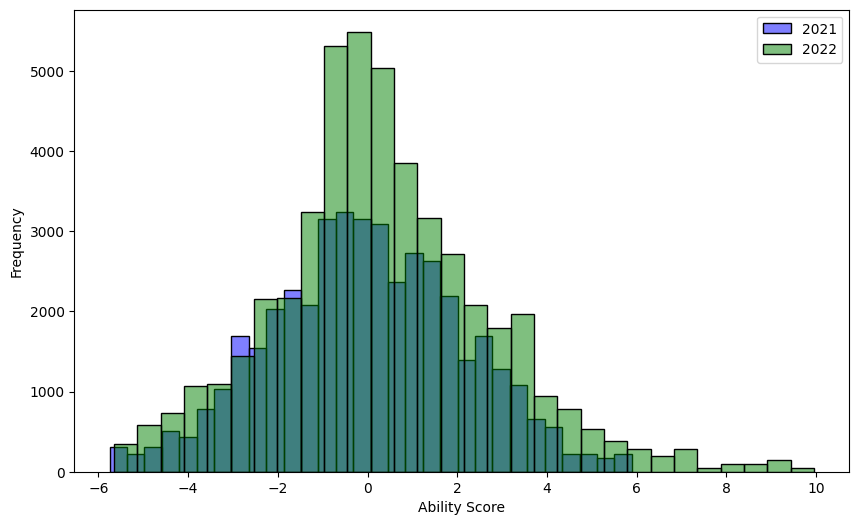

In [98]:
plt.figure(figsize=(10,6))
sns.histplot(data=students[students['year'] == 2021], x='ability',bins=30,color='blue',alpha=0.5,label='2021')
sns.histplot(data=students[students['year'] == 2022], x='ability',bins=30,color='green',alpha=0.5,label='2022')
plt.xlabel("Ability Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


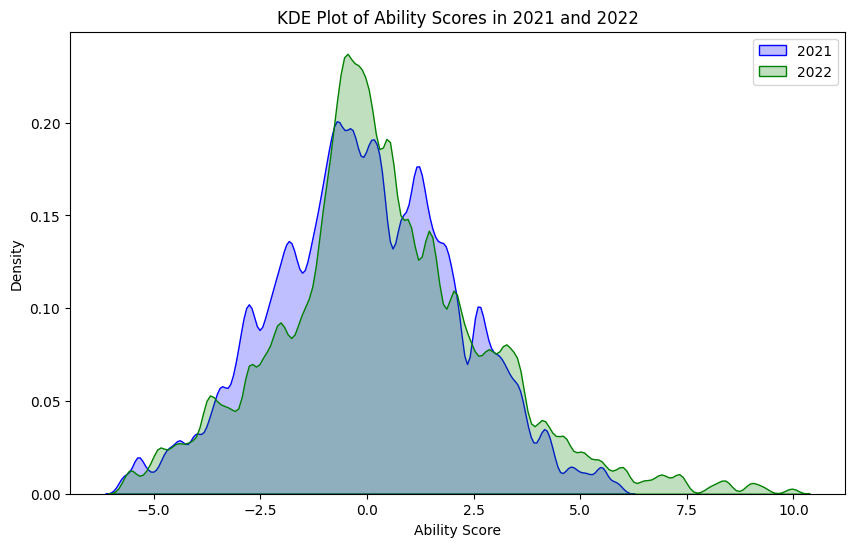

In [99]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=students[students['year'] == 2021]['ability'], label='2021', fill=True, color='blue', bw_adjust=0.5)
sns.kdeplot(data=students[students['year'] == 2022]['ability'], label='2022', fill=True, color='green', bw_adjust=0.5)

plt.xlabel('Ability Score')
plt.ylabel('Density')
plt.title('KDE Plot of Ability Scores in 2021 and 2022')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


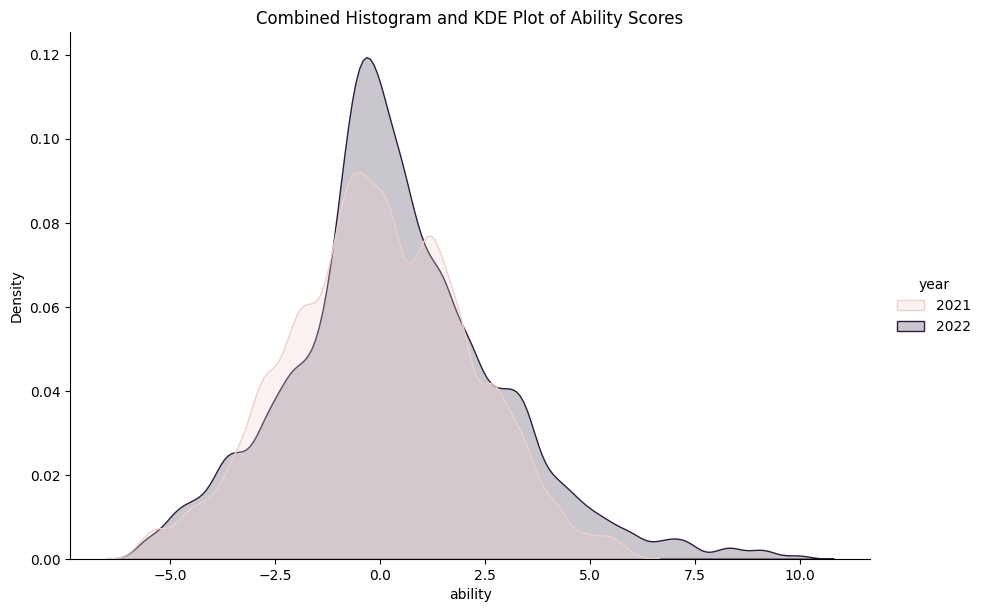

In [100]:
sns.displot(data=students, x='ability', hue='year', kind='kde', fill=True, height=6, aspect=1.5)
plt.title('Combined Histogram and KDE Plot of Ability Scores')
plt.show()

### After conducting the analysis and observing the histogram and KDE plots, it is clear that there has been an improvement in students' abilities over time:

- The average ability score is approximately -0.0427.
A negative average indicates that, on average, students may have struggled with the questions or that the scoring might be relative to a baseline. If ability scores are based on a certain metric where higher scores reflect better performance, this could suggest that the overall student performance was below average in 2021.

- The average ability score is approximately 0.3280.
This positive average suggests an improvement in student ability from the previous year. Students were able to answer questions correctly at a higher rate or demonstrated better skills relative to the metrics used.
Conclusion on Student Performance

- There is a noticeable improvement in the average ability score from 2021 to 2022. This could indicate several things:
Students may have received better instruction or resources.
The questions might have been adjusted to be more aligned with students' learning.
Students may have benefited from practice or familiarity with the material over the year.


Now, let’s examine whether any students repeated the year and if their performance improved.

In [101]:
Repeated_students = students.groupby('student_id').filter(lambda x: x['year'].nunique() > 1)
Repeated_students 

,student_id,question_id,ability,difficulty,answered_correctly,year


The output indicates that there are no common students present between the two years.

## Did the questions get difficult or easy?

Now, let's delve into an analysis to determine whether the difficulty of the questions has increased or decreased over the years. By examining the data on question difficulty, we can assess any trends or patterns that may indicate changes in the level of challenge presented to the students

In [102]:
students['difficulty_level'] = pd.qcut(students['difficulty'], q=3,labels=['Easy','Medium','Difficult'])
students.head()

,student_id,question_id,ability,difficulty,answered_correctly,year,difficulty_level
0,967,40,-0.320326,1.572793,False,2021,Difficult
1,135,2,-2.897524,-1.920777,False,2021,Easy
2,553,18,-1.207800,-0.482901,False,2021,Medium
3,564,29,-2.012802,0.360224,False,2021,Medium
4,449,42,0.332158,1.211066,False,2021,Difficult


In [103]:
correct_ans_difficulty = students.groupby(['year','difficulty_level'])['answered_correctly'].mean()
print(f"correctness rate by difficulty level and year: {correct_ans_difficulty}")

correctness rate by difficulty level and year: year  difficulty_level
2021  Easy                0.709715
      Medium              0.488124
      Difficult           0.283287
2022  Easy                0.748836
      Medium              0.543073
      Difficult           0.287087
Name: answered_correctly, dtype: float64


/var/folders/dj/_vpqfgb17k18nd8kb1yplfgh0000gn/T/ipykernel_19663/2258410640.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correct_ans_difficulty = students.groupby(['year','difficulty_level'])['answered_correctly'].mean()


In [104]:
difficult_question = students[students['difficulty'] > 0.7]

correct_rate_difficult = difficult_question.groupby('year')['answered_correctly'].mean()
print(f"correct rate of difficult questions per year : {correct_rate_difficult}")


correct rate of difficult questions per year : year
2021    0.283287
2022    0.287087
Name: answered_correctly, dtype: float64


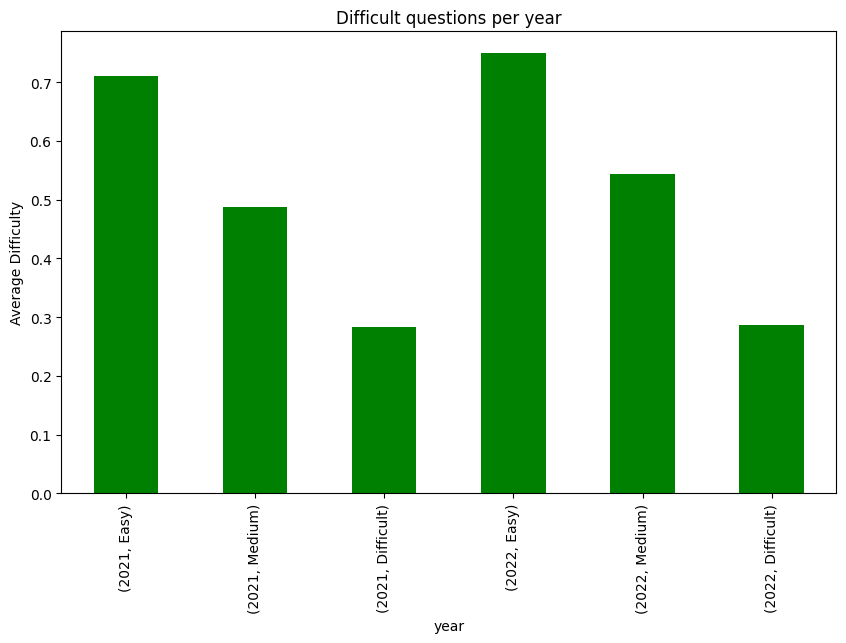

In [105]:
plt.figure(figsize=(10,6))
correct_ans_difficulty.plot(kind='bar',color='green')
plt.title("Difficult questions per year")
plt.xlabel("year")
plt.ylabel("Average Difficulty")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


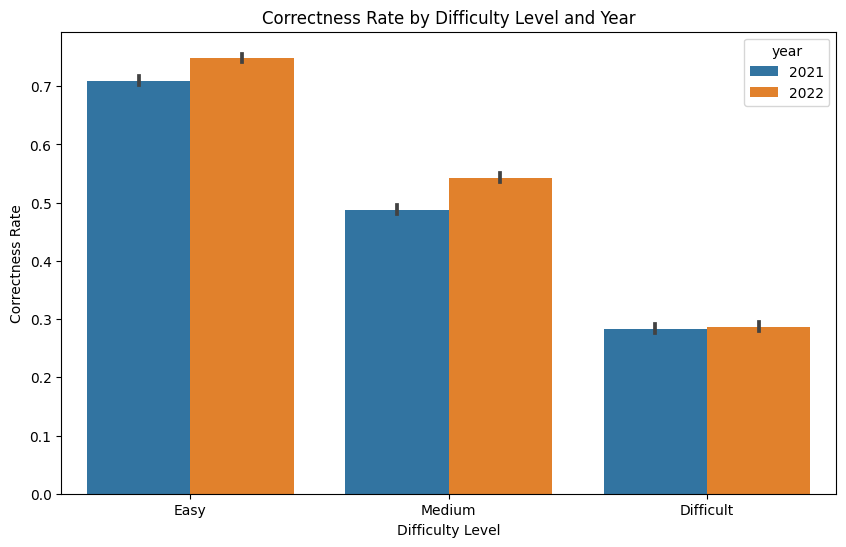

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(x='difficulty_level', y='answered_correctly', hue='year', data=students)
plt.title("Correctness Rate by Difficulty Level and Year")
plt.xlabel("Difficulty Level")
plt.ylabel("Correctness Rate")
plt.show()


## Findings on Student Performance by Question Difficulty

After performing the analysis, including a visual representation through a bar plot, we can observe the correctness rates categorized by difficulty levels for the years 2021 and 2022:

- 2021:
Easy: 70.97%
Medium: 48.81%
Difficult: 28.33%
- 2022:
Easy: 74.88%
Medium: 54.31%
Difficult: 28.71%

- Analysis of Difficult Questions
The correctness rates for difficult questions are as follows:
2021: 28.33%
2022: 28.71%

- This analysis indicates that there is an increase in the correctness rates for easy and medium questions from 2021 to 2022, suggesting that students have improved their performance on these question types over time. However, the correctness rate for difficult questions shows a slight improvement from 28.33% in 2021 to 28.71% in 2022. This minimal change suggests that while there may be a slight improvement, difficult questions still present a significant challenge for students.

- Overall, the data suggests that while students are becoming more adept at answering easier and medium-difficulty questions, their performance on difficult questions remains relatively stagnant. This highlights an area for potential improvement in instruction or study strategies.

- To further illustrate these findings, a bar plot depicting the correctness rates for each difficulty level across the years can provide a visual representation of these trends and performance changes.

In [107]:
students.head()

,student_id,question_id,ability,difficulty,answered_correctly,year,difficulty_level
0,967,40,-0.320326,1.572793,False,2021,Difficult
1,135,2,-2.897524,-1.920777,False,2021,Easy
2,553,18,-1.207800,-0.482901,False,2021,Medium
3,564,29,-2.012802,0.360224,False,2021,Medium
4,449,42,0.332158,1.211066,False,2021,Difficult


In [111]:
label_encoder = LabelEncoder()
students['difficulty_level'] = label_encoder.fit_transform(students['difficulty_level'])

In [112]:
students.head()

,student_id,question_id,ability,difficulty,answered_correctly,year,difficulty_level
0,967,40,-0.320326,1.572793,False,2021,0
1,135,2,-2.897524,-1.920777,False,2021,1
2,553,18,-1.207800,-0.482901,False,2021,2
3,564,29,-2.012802,0.360224,False,2021,2
4,449,42,0.332158,1.211066,False,2021,0


In [113]:
students.corr()

,student_id,question_id,ability,difficulty,answered_correctly,year,difficulty_level
student_id,1.000000,0.077673,0.068612,0.066424,0.020089,0.865679,-0.079201
question_id,0.077673,1.000000,0.006475,0.975061,-0.374483,0.089910,-0.456601
ability,0.068612,0.006475,1.000000,0.005570,0.687166,0.079580,-0.007986
difficulty,0.066424,0.975061,0.005570,1.000000,-0.382314,0.076980,-0.502244
answered_correctly,0.020089,-0.374483,0.687166,-0.382314,1.000000,0.018078,0.182975
year,0.865679,0.089910,0.079580,0.076980,0.018078,1.000000,-0.091052
difficulty_level,-0.079201,-0.456601,-0.007986,-0.502244,0.182975,-0.091052,1.000000


## Correlation Analysis Summary

- The correlation analysis reveals several important relationships among the variables. There is a strong positive correlation (0.865679) between year and student_id, indicating a potential increase in student enrollments or unique identifiers over time. Furthermore, question_id is very strongly correlated with difficulty (0.975061), suggesting that questions are designed to progressively increase in difficulty levels.

- The correlation between ability and answered_correctly (0.687166) indicates that students with higher ability scores tend to answer questions correctly more often. Additionally, the relationship between difficulty and answered_correctly (-0.382314) shows that as question difficulty increases, the likelihood of answering correctly decreases, which emphasizes the challenges posed by more difficult questions.

- It is also notable that the correlation between difficulty_level and answered_correctly was not explicitly mentioned, but it could further inform us about the effects of question difficulty on student performance. Given these observations, it is important to note that student_id and question_id will not be considered as feature variables in the analysis. Including ID columns does not provide meaningful insights into student performance or question difficulty, as they are merely identifiers without predictive power.

## Can you create a model that can predict if a student will answer a question correctly?

Now, let's transition to an important aspect of our analysis: the development of a predictive model aimed at determining whether a student will successfully answer a given question. This model will leverage various features, such as the student's ability, the question's difficulty level, and historical performance data, to generate insights into student outcomes. By employing machine learning techniques, we can analyze patterns in the data and identify factors that contribute to correct responses. This predictive capability not only enhances our understanding of student performance but also provides actionable insights that can inform instructional strategies and improve learning outcomes.

In [114]:
feature = students[['ability','difficulty','year','difficulty_level']]
target = students['answered_correctly']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [116]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [118]:
import joblib

# Initialize variables to keep track of the best model
best_model = None
best_model_name = ""
best_r2_score = float('-inf')  # Start with the lowest possible score

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print model performance
    print(model_name)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print('\n')

    # Update the best model if the current model has a higher R² score on the test set
    if model_test_r2 > best_r2_score:
        best_r2_score = model_test_r2
        best_model = model
        best_model_name = model_name

# Save the best model to a file
if best_model:
    joblib.dump(best_model, f'best_model_{best_model_name}.pkl')
    print(f"Best model '{best_model_name}' saved with R² score: {best_r2_score:.4f}")


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3074
- Mean Absolute Error: 0.2673
- R2 Score: 0.6217
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3081
- Mean Absolute Error: 0.2681
- R2 Score: 0.6200


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4999
- Mean Absolute Error: 0.4997
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4998
- Mean Absolute Error: 0.4997
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3074
- Mean Absolute Error: 0.2673
- R2 Score: 0.6217
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3081
- Mean Absolute Error: 0.2681
- R2 Score: 0.6200


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0224
- Mean Absolute Error: 0.0012
- R2 Score: 0.9980
----------------------

### Model Performance Summary

The following table summarizes the performance metrics for various regression models evaluated on both the training and test sets:

| Model                     | Training Set RMSE | Training Set MAE | Training Set R²  | Test Set RMSE | Test Set MAE | Test Set R²  |
|---------------------------|--------------------|-------------------|------------------|---------------|--------------|---------------|
| **Linear Regression**     | 0.3074             | 0.2673            | 0.6217           | 0.3081        | 0.2681       | 0.6200        |
| **Lasso**                 | 0.4999             | 0.4997            | 0.0000           | 0.4998        | 0.4997       | -0.0000       |
| **Ridge**                 | 0.3074             | 0.2673            | 0.6217           | 0.3081        | 0.2681       | 0.6200        |
| **K-Neighbors Regressor** | 0.0224             | 0.0012            | 0.9980           | 0.0265        | 0.0015       | 0.9972        |
| **Decision Tree**         | 0.0000             | 0.0000            | 1.0000           | 0.0287        | 0.0008       | 0.9967        |
| **Random Forest Regressor**| 0.0094            | 0.0005            | 0.9996           | 0.0210        | 0.0012       | 0.9982        |
| **XGBRegressor**         | 0.0158             | 0.0035            | 0.9990           | 0.0290        | 0.0049       | 0.9966        |
| **CatBoosting Regressor** | 0.0409            | 0.0120            | 0.9933           | 0.0456        | 0.0126       | 0.9917        |
| **AdaBoost Regressor**   | 0.2277             | 0.1654            | 0.7924           | 0.2284        | 0.1663       | 0.7911        |


Analysis of Results
Linear Regression and Ridge Regression demonstrated similar performance, indicating that linear models may not be the most suitable for this dataset.
Lasso Regression showed poor performance, likely due to its tendency to shrink coefficients towards zero, resulting in a lack of predictive power.
The K-Neighbors Regressor, XGBRegressor, and CatBoosting Regressor also performed well, with R² scores above 0.99, indicating a strong fit for the training data.
The Decision Tree model achieved a perfect fit on the training set but showed some overfitting with a slightly lower R² score on the test set.
AdaBoost provided moderate performance, suggesting room for improvement.

### Best Performing Model

The best-performing model was the Random Forest Regressor, which achieved an R² score of 0.9982 on the test set. This indicates a highly accurate model for predicting student performance based on the provided features, reflecting its ability to generalize well to unseen data.
The best-performing model was the **Random Forest Regressor**, which achieved an R² score of **0.9982** on the test set. This indicates a highly accurate model for predicting student performance based on the provided features, reflecting its ability to generalize well to unseen data.




# Conclusion:

- The Random Forest Regressor emerged as the best model, achieving an R² score of 0.9982 on the test set, indicating it explains a significant portion of the variance in the response variable. In contrast, the Lasso regression performed poorly with an R² score of 0.0000, suggesting it does not capture the relationships in the data effectively.
- The analysis of correctness rates across different difficulty levels showed that while there was a noticeable improvement in performance for easy and medium questions from 2021 to 2022, the correctness rate for difficult questions remained relatively stagnant (28.33% in 2021 to 28.71% in 2022). This indicates that while students are improving, they still struggle with difficult questions, highlighting a potential area for targeted instructional strategies.
- The correlation between ability and answered_correctly (0.687166) underscores the importance of students’ ability scores in predicting their performance. This could imply that interventions aimed at improving students’ abilities may lead to better performance in answering questions correctly.
- The negative correlation between difficulty and answered_correctly (-0.382314) indicates that as the difficulty level of questions increases, the likelihood of students answering correctly decreases. This relationship reinforces the need for differentiated instruction, especially for more challenging material.
- The Decision Tree model exhibited an R² score of 1.0000 on the training set but decreased to 0.9967 on the test set, suggesting potential overfitting. This indicates that while the model fits the training data perfectly, it may not generalize well to unseen data.
- The data indicates a clear need for ongoing support for students when facing difficult questions. Implementing focused training sessions or tutoring could help improve their performance in this area, which remains a challenge despite overall improvements in other question types.

# Recommandation: 
**There is potential for improving model performance and predictive accuracy by incorporating additional features. Gathering more relevant data, such as student engagement metrics, study habits, or demographic information, could provide deeper insights into factors influencing student performance and lead to more robust models. Additionally, exploring interactions between existing features, such as the relationship between ability and question difficulty, may uncover patterns that enhance the model's ability to predict student outcomes. By focusing on these areas, the analysis can yield more comprehensive insights and better inform educational strategies.**